In [2]:
import agama
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
from astropy.visualization import quantity_support
from galpy import df as gdf
from galpy import potential as gpot
import corner

# PROJECT-SPECIFIC
from discO import (
    GaussianMeasurementErrorSampler,
    PotentialFitter,
    PotentialSampler,
    conf,
)
from discO.plugin.agama.fitter import (
    AGAMAMultipolePotentialFitter,
    AGAMAPotentialFitter,
)
from discO.core.pipeline import Pipeline
#from discO.core.residual import GridResidual

import matplotlib.pyplot as plt
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
    'axes.titlesize':25,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 12,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 12,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'text.usetex': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)

Parameters

In [3]:
mass = 1e12 * u.solMass
r0 = 10 * u.kpc  # scale factor

Code

In [4]:
hernquist_pot = gpot.HernquistPotential(amp=2 * mass, a=r0)
sampler = PotentialSampler(gdf.isotropicHernquistdf(hernquist_pot))
fitter = PotentialFitter(None, key="agama", pot_type="multipole", gridsizeR=10, lmax=10)

In [106]:
samples = sampler.sample(n=10000, frame=coord.Galactocentric())
pot_fit = fitter(samples)
pot_fit.export('coeffs.txt')
labels = ['$\Phi_{0,0}$','$\Phi_{2,0}$','$\Phi_{4,0}$']
coeff = np.loadtxt('coeffs.txt', skiprows=6, usecols=(0,1,7,21), max_rows=50)

array([ 1.38479608e+01, -8.43167562e+10, -1.86236128e+07, -5.31914567e+07])

In [149]:
N = 1000
failed = 0
coeff_array = np.zeros((N,4))

for i in range(N):
    samples = sampler.sample(n=10000, frame=coord.Galactocentric())
    pot_fit = fitter(samples)
    pot_fit.export('coeffs.txt')
    coeff = np.loadtxt('coeffs.txt', skiprows=6, usecols=(0,1,7,21), max_rows=50)
    coeff_array[i,:] = coeff[4,:]

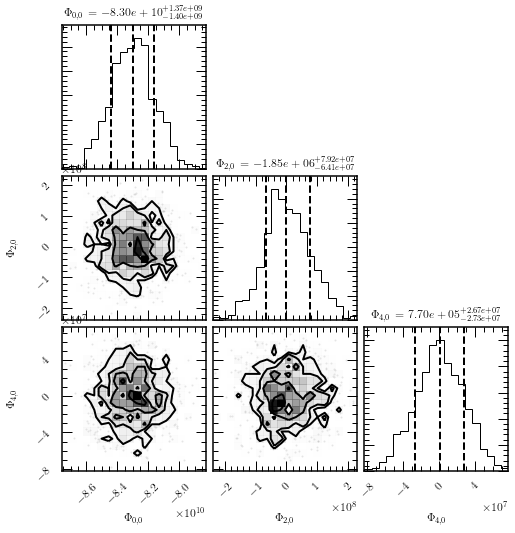

In [159]:
labels = ['$\Phi_{0,0}$','$\Phi_{2,0}$','$\Phi_{4,0}$']
fig= corner.corner(coeff_array[:,1:], labels=labels, show_titles=True, quantiles=[0.16, 0.5, 0.84],
                       title_kwargs={"fontsize": 12}, title_fmt='.2e',
                      label_kwargs={"fontsize":12}, hist2d_kwargs={"fontsize":8})
#fig.suptitle('Coefficient Correlations at R = 13 kpc', fontsize=12)

fig.savefig('corner_13.png')